## Multinomial Naive Bayes:

`MultinomialNB` is a class in the `scikit-learn` library, which stands for "Multinomial Naive Bayes." 
 - It is a variant of the Naive Bayes algorithm that is particularly suitable for working with discrete data, such as word counts, bag-of-words representations, and other frequency-based features. 
 - The Multinomial Naive Bayes algorithm is based on Bayes' theorem and assumes that the features are conditionally independent given the class label. 
 - MultinomialNB calculates the likelihood of each feature occurring in each class and combines it with the prior probability of each class to make predictions. 
 - Despite its simplifying assumptions, MultinomialNB can be effective for high-dimensional feature spaces and is efficient in both training and prediction.

It is commonly used for text classification tasks, where the feature vectors represent word counts or term frequencies. It is also commonly used in text classification tasks like spam detection, sentiment analysis, and fake news detection.


In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
# stopwords is a collection of common words that are considered to have 
# little or no meaning in the context of natural language processing 
# tasks, such as text classification, sentiment analysis & information retrieval.
from nltk.stem.porter import PorterStemmer
# The main purpose of the PorterStemmer is to normalize words by 
# removing common suffixes to obtain their base form.
import re
# With the re module, you can perform various operations on strings, 
# such as searching, matching, replacing, and splitting based on 
# specific patterns. Regular expressions are especially useful in tasks 
# involving text preprocessing, data cleaning, and pattern extraction.
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, HashingVectorizer
# CountVectorizer is a text preprocessing tool that transforms 
# raw text data into a matrix of token counts, representing the 
# frequency of each word (token) in the documents.
# TfidfVectorizer stands for Term Frequency-Inverse Document Frequency 
# Vectorizer. It is similar to CountVectorizer but takes into account 
# the importance of words in each document relative to the entire corpus.
# Words that appear frequently in a specific document but rarely in 
# other documents are given higher weights.
# HashingVectorizer is another feature extraction technique that uses 
# a hashing trick to convert text data into fixed-size vectors.
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
import warnings
warnings.filterwarnings("ignore")

In [2]:
fake = pd.read_csv('Fake.csv')
true = pd.read_csv('True.csv')
fake.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [3]:
true.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [4]:
fake['Label'] = 0
true['Label'] = 1

### Data Preprocessing:

In [5]:
data = pd.concat([fake.iloc[:2000, :], true.iloc[:2000, :]], axis = 0, ignore_index = True)
data = shuffle(data).reset_index(drop = True)
print(data.shape)
data.head()

(4000, 5)


,title,text,subject,date,Label
0,Former Director Of National Intelligence Says...,"James Clapper, the Director of National Intell...",News,"September 23, 2017",0
1,New Mexico Is Erasing Actual Science From The...,"Education standards, it seems, is now a term...",News,"September 29, 2017",0
2,"In White House Conference Call About Iran, St...",The contrast between the Obama White House and...,News,"July 19, 2017",0
3,Republican Viciously Attacks McCain: Give Me ...,"A Republican state senator from Arizona, Kelli...",News,"July 22, 2017",0
4,"Japan's Abe: agreed with Trump, Putin on coope...",TOKYO (Reuters) - Japanese Prime Minister Shin...,politicsNews,"September 3, 2017",1


In [6]:
# Dropping Unnecessary Variables:
data.drop(['title', 'subject', 'date'], axis = 1, inplace = True)
data.head()

,text,Label
0,"James Clapper, the Director of National Intell...",0
1,"Education standards, it seems, is now a term...",0
2,The contrast between the Obama White House and...,0
3,"A Republican state senator from Arizona, Kelli...",0
4,TOKYO (Reuters) - Japanese Prime Minister Shin...,1


In [7]:
data.text[9]

'On Sunday, Fox News had a rare moment of clarity and actually decided to share the truth with their viewers, breaking the hearts of Donald Trump voters around the world.As Trump continues to brag and tweet about polls that are biased and inaccurate (while ignoring actual facts), Fox News blasted the failing POTUS  disastrous health care plan and noted that Americans overwhelmingly prefer Obamacare.The poll was taken just a few days ago and states that 50% of Americans approve Obamacare, and only 24% are willing to support a Republican replacement. Some weren t fond of either (13%), but the evidence was clear   the people in this country do not want the GOP to repeal the Affordable Care Act and replace it with one of their death sentences.This poll comes just days after Trump trashed the Republican Party on Twitter, calling out their  failed  health care plan and urging them to make a decision as soon as possible. Trump and the GOP are more desperate than ever for a legislative win, an

In [8]:
# Creating independent & dependent variables:
X = data.drop(['Label'], axis = 1)
y = data['Label']
X.head()

,text
0,"James Clapper, the Director of National Intell..."
1,"Education standards, it seems, is now a term..."
2,The contrast between the Obama White House and...
3,"A Republican state senator from Arizona, Kelli..."
4,TOKYO (Reuters) - Japanese Prime Minister Shin...


In [9]:
y.head()

0    0
1    0
2    0
3    0
4    1
Name: Label, dtype: int64

In [10]:
# Stemming & Removing StopWords:
ps = PorterStemmer()
corpus = []
for i in range(len(X)):
    review = re.sub("[^a-zA-Z]", " ", X["text"][i])
# This line of code will process the text data in X["text"][i] by 
# removing any non-alphabetic characters and replacing them with spaces. 
    review = review.lower()
    review = review.split()
    review = [ps.stem(word) for word in review if word not in stopwords.words("english")]
    review = " ".join(review)
    corpus.append(review)

In [11]:
vector = TfidfVectorizer(max_features = 5000, ngram_range = (1, 3))
X = vector.fit_transform(corpus).toarray()
print(X.shape)
print(y.shape)

(4000, 5000)
(4000,)


### Model Evaluation:

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(2800, 5000)
(1200, 5000)
(2800,)
(1200,)


In [13]:
classifier = MultinomialNB()
classifier.fit(X_train, y_train)
pred = classifier.predict(X_test)
score = metrics.accuracy_score(y_test, pred)
print("Accuracy of the Model: {}%".format(score*100))

Accuracy of the Model: 97.5%


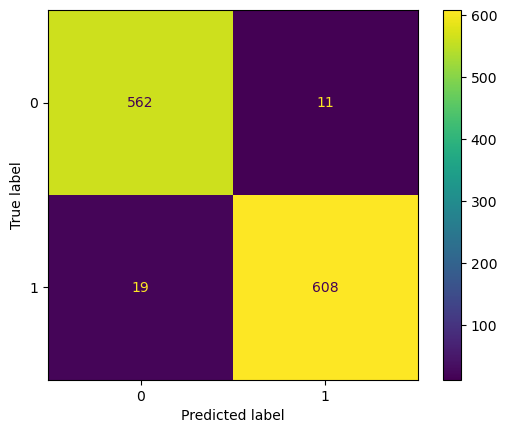

In [14]:
cm = metrics.confusion_matrix(y_test, pred)
metrics.plot_confusion_matrix(classifier, X_test, y_test)
plt.show()